In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Fraud Detection/online-payments/online-payments.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Data Cleaning

Remove unnecessary stuff and checking for NULL Values

In [ ]:
df = df.drop(["nameOrig", "nameDest"], axis=1)
# Convert the Type column to its seperate 'Type Column' as bool values
df = pd.get_dummies(df, columns=["type"], drop_first=True)

print(df.isnull().sum())
df

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,True,False,False,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,True


In [ ]:
import matplotlib.pyplot as plt

fraud_count = df['isFraud'].value_counts()
print("Fraudulent Transactions: ")
print(fraud_count)

Fraudulent Transactions: 
isFraud
0    6354407
1       8213
Name: count, dtype: int64


TODO:
1. Make a pie chart of this (Fraudulent Transactions | Before Balancing)
2. Balance the dataset for testing and training
3. Make a pie chart of this (Fraudulent Transactions | After Balancing)

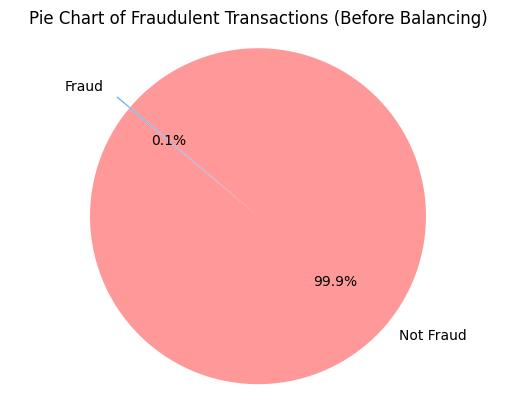

In [ ]:
# Pie chart before Balancing
labels = ['Not Fraud', 'Fraud']
sizes = fraud_count.values
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Fraudulent Transactions (Before Balancing)')
plt.show()

## Data Processing

Balance Minority Class (isFraud) using SMOTE

In [ ]:
# Balance the dataset for testing and training
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of training data before resampling:", X_train.shape)
print("Shape of training data after resampling:", X_train_resampled.shape)

# Display the distribution of the target variable after resampling
print("\nFraudulent Transactions (After Balancing):")
print(y_train_resampled.value_counts())

Shape of training data before resampling: (4453834, 11)
Shape of training data after resampling: (8896170, 11)

Fraudulent Transactions (After Balancing):
isFraud
0    4448085
1    4448085
Name: count, dtype: int64


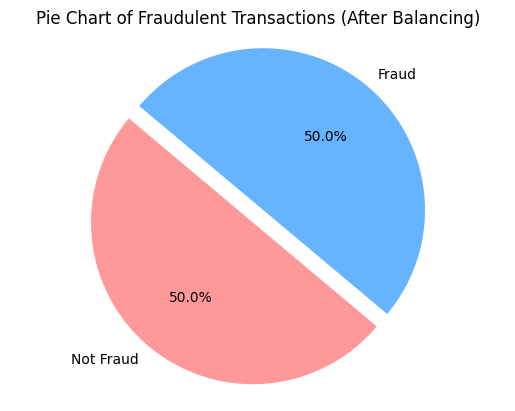

In [ ]:
# Pie chart after Balancing
import matplotlib.pyplot as plt

fraud_count_resampled = y_train_resampled.value_counts()
labels = ['Not Fraud', 'Fraud']
sizes = fraud_count_resampled.values
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Fraudulent Transactions (After Balancing)')
plt.show()

# Model Training

## Train a XGBoost model

### Subtask:
Train a XGBoost model.

XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1906322
           1       0.11      0.99      0.19      2464

    accuracy                           0.99   1908786
   macro avg       0.55      0.99      0.59   1908786
weighted avg       1.00      0.99      0.99   1908786

Confusion Matrix:


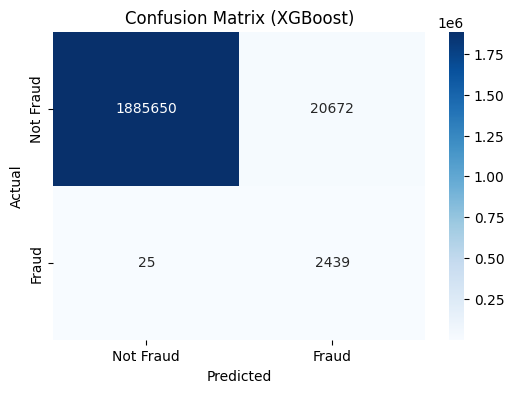

Accuracy Score: 
0.9891569825009194


In [ ]:
# Train XGBoost Model | 1st runtime

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize XGBoost classifier
# For GPU support, you might need to set 'tree_method' to 'gpu_hist'
# and ensure you have a CUDA-enabled build of XGBoost

# Define parameters for the XGBoost model
param = {
    'objective': 'binary:logistic',  # Objective for binary classification
    'eval_metric': 'logloss',        # Evaluation metric
    'eta': 0.1,                      # Learning rate
    'max_depth': 4,                  # Maximum depth of a tree
    'subsample': 0.8,                # Subsample ratio of the training instances
    'colsample_bytree': 0.8,         # Subsample ratio of columns when constructing each tree
    'seed': 42,                      # Random seed
    'tree_method': 'hist',         # Use 'hist' with device='cuda' for GPU training
    'device': 'cuda'                 # Specify CUDA device
}

# Convert data to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the model
xgb_model = xgb.train(param, dtrain, num_boost_round=100) # You can adjust the number of boosting rounds

# Evaluate the model (initial evaluation on test set)
y_pred_prob_xgb = xgb_model.predict(dtest)
y_pred_xgb = (y_pred_prob_xgb > 0.5).astype(int) # Convert probabilities to binary predictions

print("XGBoost Model Evaluation:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

print('Accuracy Score: ')
print(accuracy_score(y_test, y_pred_xgb))

XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1906322
           1       0.11      0.99      0.19      2464

    accuracy                           0.99   1908786
   macro avg       0.55      0.99      0.59   1908786
weighted avg       1.00      0.99      0.99   1908786

Confusion Matrix:


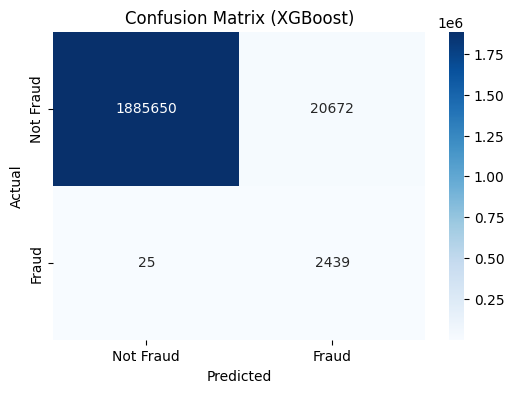

Accuracy Score: 
0.9891569825009194


In [ ]:
# Train XGBoost Model | 2nd runtime

# Initialize XGBoost classifier
# For GPU support, you might need to set 'tree_method' to 'gpu_hist'
# and ensure you have a CUDA-enabled build of XGBoost

# Define parameters for the XGBoost model
param = {
    'objective': 'binary:logistic',  # Objective for binary classification
    'eval_metric': 'logloss',        # Evaluation metric
    'eta': 0.1,                      # Learning rate
    'max_depth': 4,                  # Maximum depth of a tree
    'subsample': 0.8,                # Subsample ratio of the training instances
    'colsample_bytree': 0.8,         # Subsample ratio of columns when constructing each tree
    'seed': 42,                      # Random seed
    'tree_method': 'hist',         # Use 'hist' with device='cuda' for GPU training
    'device': 'cuda'                 # Specify CUDA device
}

# Convert data to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the model
xgb_model = xgb.train(param, dtrain, num_boost_round=100) # You can adjust the number of boosting rounds

# Evaluate the model (initial evaluation on test set)
y_pred_prob_xgb = xgb_model.predict(dtest)
y_pred_xgb = (y_pred_prob_xgb > 0.5).astype(int) # Convert probabilities to binary predictions

print("XGBoost Model Evaluation:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

print('Accuracy Score: ')
print(accuracy_score(y_test, y_pred_xgb))

XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1906322
           1       0.11      0.99      0.19      2464

    accuracy                           0.99   1908786
   macro avg       0.55      0.99      0.59   1908786
weighted avg       1.00      0.99      0.99   1908786

Confusion Matrix:


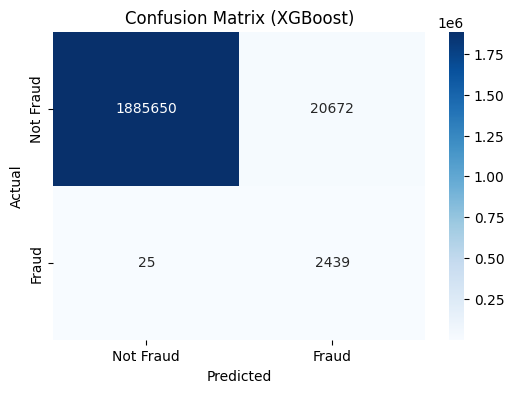

Accuracy Score: 
0.9891569825009194


In [ ]:
# Train XGBoost Model | 3rd runtime

# Initialize XGBoost classifier
# For GPU support, you might need to set 'tree_method' to 'gpu_hist'
# and ensure you have a CUDA-enabled build of XGBoost

# Define parameters for the XGBoost model
param = {
    'objective': 'binary:logistic',  # Objective for binary classification
    'eval_metric': 'logloss',        # Evaluation metric
    'eta': 0.1,                      # Learning rate
    'max_depth': 4,                  # Maximum depth of a tree
    'subsample': 0.8,                # Subsample ratio of the training instances
    'colsample_bytree': 0.8,         # Subsample ratio of columns when constructing each tree
    'seed': 42,                      # Random seed
    'tree_method': 'hist',           # Use 'hist' with device='cuda' for GPU training
    'device': 'cuda'                 # Specify CUDA device
}

# Convert data to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the model
xgb_model = xgb.train(param, dtrain, num_boost_round=100) # You can adjust the number of boosting rounds

# Evaluate the model (initial evaluation on test set)
y_pred_prob_xgb = xgb_model.predict(dtest)
y_pred_xgb = (y_pred_prob_xgb > 0.5).astype(int) # Convert probabilities to binary predictions

print("XGBoost Model Evaluation:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

print('Accuracy Score: ')
print(accuracy_score(y_test, y_pred_xgb))

## Train a lightgbm model

### Subtask:
Train a LightGBM model.


[LightGBM] [Info] Number of positive: 4448085, number of negative: 4448085
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.697787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1540
[LightGBM] [Info] Number of data points in the train set: 8896170, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906322
           1       0.16      0.99      0.28      2464

    accuracy                           0.99   1908786
   macro avg       0.58      0.99      0.64   1908786
weighted avg       1.00      0.99      1.00   1908786

Confusion Matrix:


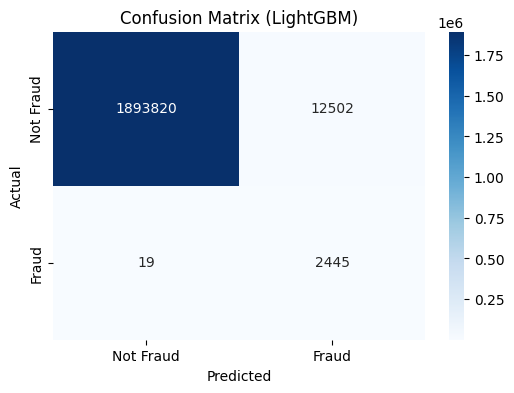

Accuracy Score: 
0.9934403332798962


In [ ]:
# 1st runtime
import lightgbm as lgb

# Create LightGBM Dataset
lgb_train = lgb.Dataset(X_train_resampled, y_train_resampled)

# Define parameters for LightGBM model
lgb_param = {
    'objective': 'binary',  # Binary classification
    'metric': 'binary_logloss',  # Evaluation metric
    'boosting_type': 'gbdt',  # Traditional Gradient Boosting Decision Tree
    'num_leaves': 31,  # Maximum number of leaves in one tree
    'learning_rate': 0.05,  # Learning rate
    'feature_fraction': 0.9,  # Fraction of features to consider per iteration
    'seed': 42, # Random seed
    # 'device': 'cuda'  # Use CUDA for GPU acceleration
}

# Train the LightGBM model
num_round = 100  # Number of boosting rounds
lgb_model = lgb.train(lgb_param, lgb_train, num_round)

# Evaluate the LightGBM model
y_pred_prob_lgb = lgb_model.predict(X_test)
y_pred_lgb = (y_pred_prob_lgb > 0.5).astype(int)

print("\nLightGBM Model Evaluation:")
print(classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:")
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LightGBM)')
plt.show()

print('Accuracy Score: ')
print(accuracy_score(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 4448085, number of negative: 4448085
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.427205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1540
[LightGBM] [Info] Number of data points in the train set: 8896170, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906322
           1       0.16      0.99      0.28      2464

    accuracy                           0.99   1908786
   macro avg       0.58      0.99      0.64   1908786
weighted avg       1.00      0.99      1.00   1908786

Confusion Matrix:


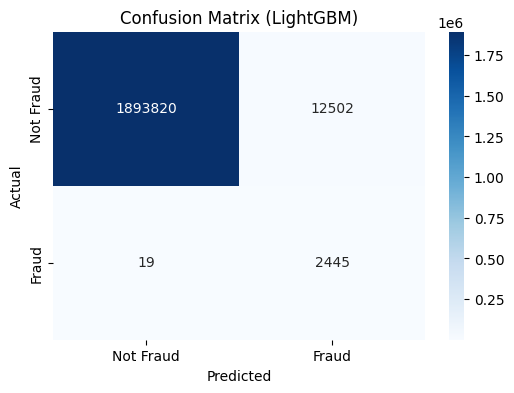

Accuracy Score: 
0.9934403332798962


In [ ]:
# 2md runtime

# Create LightGBM Dataset
lgb_train = lgb.Dataset(X_train_resampled, y_train_resampled)

# Define parameters for LightGBM model
lgb_param = {
    'objective': 'binary',  # Binary classification
    'metric': 'binary_logloss',  # Evaluation metric
    'boosting_type': 'gbdt',  # Traditional Gradient Boosting Decision Tree
    'num_leaves': 31,  # Maximum number of leaves in one tree
    'learning_rate': 0.05,  # Learning rate
    'feature_fraction': 0.9,  # Fraction of features to consider per iteration
    'seed': 42, # Random seed
    # 'device': 'cuda'  # Use CUDA for GPU acceleration
}

# Train the LightGBM model
num_round = 100  # Number of boosting rounds
lgb_model = lgb.train(lgb_param, lgb_train, num_round)

# Evaluate the LightGBM model
y_pred_prob_lgb = lgb_model.predict(X_test)
y_pred_lgb = (y_pred_prob_lgb > 0.5).astype(int)

print("\nLightGBM Model Evaluation:")
print(classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:")
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LightGBM)')
plt.show()

print('Accuracy Score: ')
print(accuracy_score(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 4448085, number of negative: 4448085
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.422294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1540
[LightGBM] [Info] Number of data points in the train set: 8896170, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906322
           1       0.16      0.99      0.28      2464

    accuracy                           0.99   1908786
   macro avg       0.58      0.99      0.64   1908786
weighted avg       1.00      0.99      1.00   1908786

Confusion Matrix:


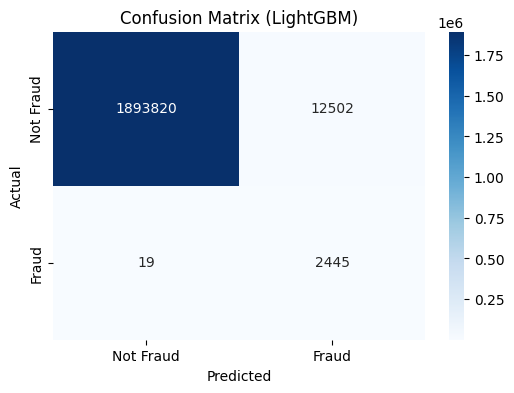

Accuracy Score: 
0.9934403332798962


In [ ]:
# 3rd runtime

# Create LightGBM Dataset
lgb_train = lgb.Dataset(X_train_resampled, y_train_resampled)

# Define parameters for LightGBM model
lgb_param = {
    'objective': 'binary',  # Binary classification
    'metric': 'binary_logloss',  # Evaluation metric
    'boosting_type': 'gbdt',  # Traditional Gradient Boosting Decision Tree
    'num_leaves': 31,  # Maximum number of leaves in one tree
    'learning_rate': 0.05,  # Learning rate
    'feature_fraction': 0.9,  # Fraction of features to consider per iteration
    'seed': 42, # Random seed
    # 'device': 'cuda'  # Use CUDA for GPU acceleration
}

# Train the LightGBM model
num_round = 100  # Number of boosting rounds
lgb_model = lgb.train(lgb_param, lgb_train, num_round)

# Evaluate the LightGBM model
y_pred_prob_lgb = lgb_model.predict(X_test)
y_pred_lgb = (y_pred_prob_lgb > 0.5).astype(int)

print("\nLightGBM Model Evaluation:")
print(classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:")
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LightGBM)')
plt.show()

print('Accuracy Score: ')
print(accuracy_score(y_test, y_pred_lgb))

## Train a random forest model

### Subtask:
Train a Random Forest model.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
# Adjust class_weight to penalize misclassifications of the minority class more heavily
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fit the model to the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

## Evaluate the Random Forest model and extract key metrics.

### Subtask:
Evaluate the Random Forest model and extract key metrics.


Random Forest Model Evaluation (with class_weight='balanced'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.67      0.93      0.78      2464

    accuracy                           1.00   1908786
   macro avg       0.83      0.97      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:


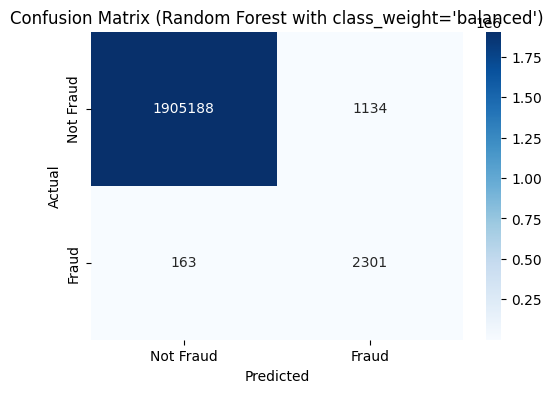

Accuracy Score: 
0.9993205105234426


In [ ]:
# Evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Model Evaluation (with class_weight='balanced'):")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest with class_weight=\'balanced\')')
plt.show()

print('Accuracy Score: ')
print(accuracy_score(y_test, y_pred_rf))

## Model Comparison Matrix

### Subtask:
Create a comparison matrix for XGBoost, LightGBM, and Random Forest models.

In [ ]:
# Create a comparison matrix
from sklearn.metrics import precision_recall_fscore_support

# Get metrics for each model
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(y_test, y_pred_xgb, average=None)
precision_lgb, recall_lgb, f1_lgb, _ = precision_recall_fscore_support(y_test, y_pred_lgb, average=None)
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average=None)

# Create a dictionary to store the metrics
metrics_data = {
    'Model': ['XGBoost', 'XGBoost', 'LightGBM', 'LightGBM', 'Random Forest', 'Random Forest'],
    'Class': ['Not Fraud', 'Fraud', 'Not Fraud', 'Fraud', 'Not Fraud', 'Fraud'],
    'Precision': [precision_xgb[0], precision_xgb[1], precision_lgb[0], precision_lgb[1], precision_rf[0], precision_rf[1]],
    'Recall': [recall_xgb[0], recall_xgb[1], recall_lgb[0], recall_lgb[1], recall_rf[0], recall_rf[1]],
    'F1-Score': [f1_xgb[0], f1_xgb[1], f1_lgb[0], f1_lgb[1], f1_rf[0], f1_rf[1]],
    'Accuracy': [accuracy_score(y_test, y_pred_xgb), '', accuracy_score(y_test, y_pred_lgb), '', accuracy_score(y_test, y_pred_rf), '']
}

# Create a pandas DataFrame
comparison_df = pd.DataFrame(metrics_data)

# Display the comparison matrix
display(comparison_df)

,Model,Class,Precision,Recall,F1-Score,Accuracy
0,XGBoost,Not Fraud,0.999987,0.989156,0.994542,0.989157
1,XGBoost,Fraud,0.105534,0.989854,0.190733,
2,LightGBM,Not Fraud,0.999990,0.993442,0.996705,0.99344
3,LightGBM,Fraud,0.163578,0.992289,0.280857,
4,Random Forest,Not Fraud,0.999914,0.999405,0.999660,0.999321
5,Random Forest,Fraud,0.669869,0.933847,0.780132,


# Model Training Interpretation and Visual

This section provides documentation and visualizations based on the trained models and the dataset.

## About the Models

We trained three different machine learning models for fraud detection:

*   **XGBoost (Extreme Gradient Boosting):** A powerful and efficient gradient boosting algorithm known for its high performance on structured data.
*   **LightGBM (Light Gradient Boosting Machine):** Another gradient boosting framework that is generally faster and uses less memory than XGBoost, especially on large datasets.
*   **Random Forest:** An ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.

These models were trained on the balanced dataset (using SMOTE) to address the class imbalance issue.

## Common Transaction Types

Let's visualize the distribution of transaction types in the original dataset to understand the common types of transactions.

/tmp/ipython-input-2721455411.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='viridis')


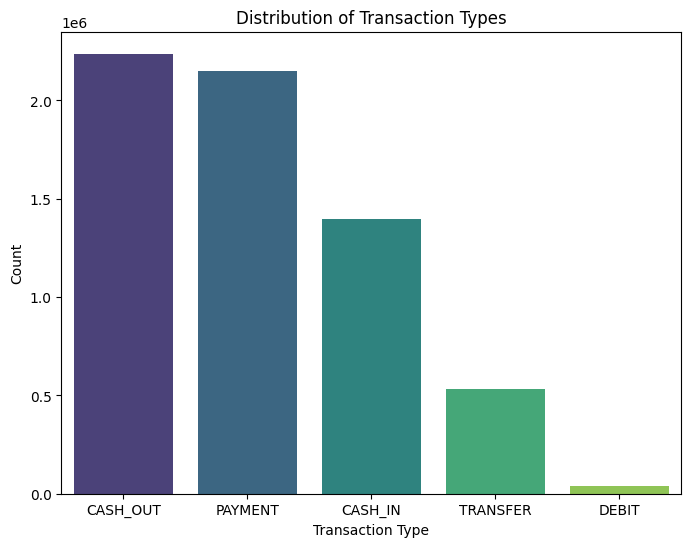

In [ ]:
# Bar graph of common transaction types
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the original dataframe again for this specific visualization
df_original = pd.read_csv('/content/drive/MyDrive/Fraud Detection/online-payments/online-payments.csv')

transaction_counts = df_original['type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='viridis')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

## SHAP Analysis Results | Bee swarm plot

SHAP Summery plots for XGBoost and LightGBM models.



> SHAP (SHapley Additive exPlanations) values show how much each feature contributes to pushing a prediction



### SHAP Implementation | Deleted Code Cell due to frequent execution and minimize time and memory usage

```py
import shap

# Initialize the Javascript visualization
shap.initjs()

# Explain the models using SHAP
# For tree-based models like XGBoost, LightGBM, and Random Forest, TreeExplainer is suitable.

# Explain XGBoost model
print("Explaining XGBoost model with SHAP...")
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)

# Summarize the effects of all features for XGBoost
print("\nSHAP Summary Plot (XGBoost):")
shap.summary_plot(shap_values_xgb, X_test)

# Explain LightGBM model
print("\nExplaining LightGBM model with SHAP...")
explainer_lgb = shap.TreeExplainer(lgb_model)
shap_values_lgb = explainer_lgb.shap_values(X_test)

# Summarize the effects of all features for LightGBM
print("\nSHAP Summary Plot (LightGBM):")
shap.summary_plot(shap_values_lgb, X_test)

```



### SHAP Summary Plot for XGBoost


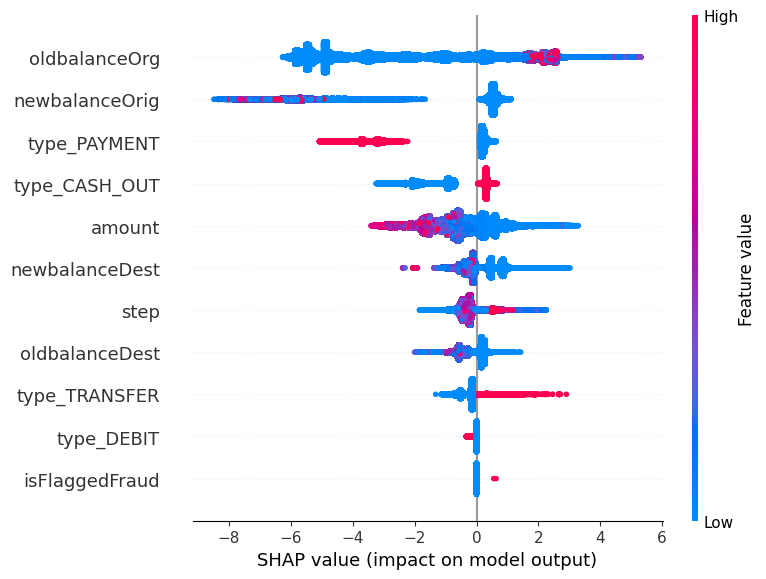

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Fraud Detection/SHAP_XGBoost.png')

### SHAP Summary Plot for LightGBM

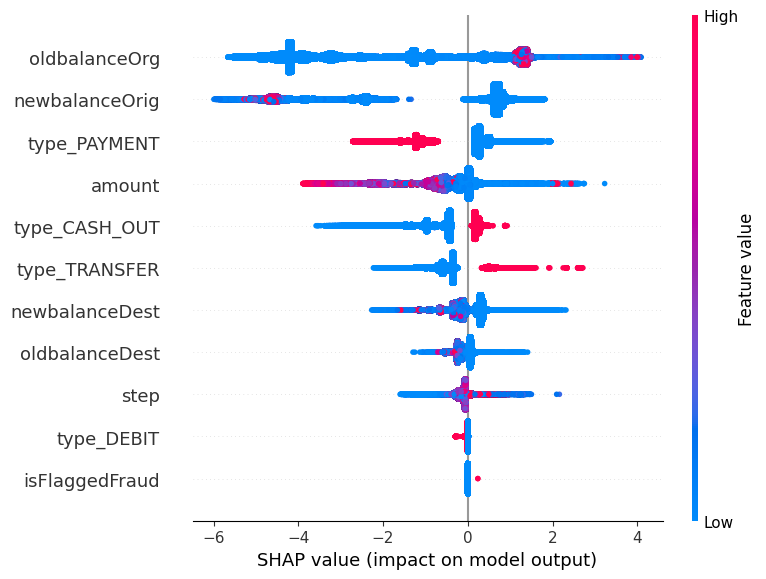

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Fraud Detection/SHAP_LightGBM.png')

## Best Performing Model

To determine the best-performing model, we will compare their key metrics, focusing on the F1-score for the minority class (Fraud) and potentially AUC-PR, as these are more informative for imbalanced datasets than just accuracy.

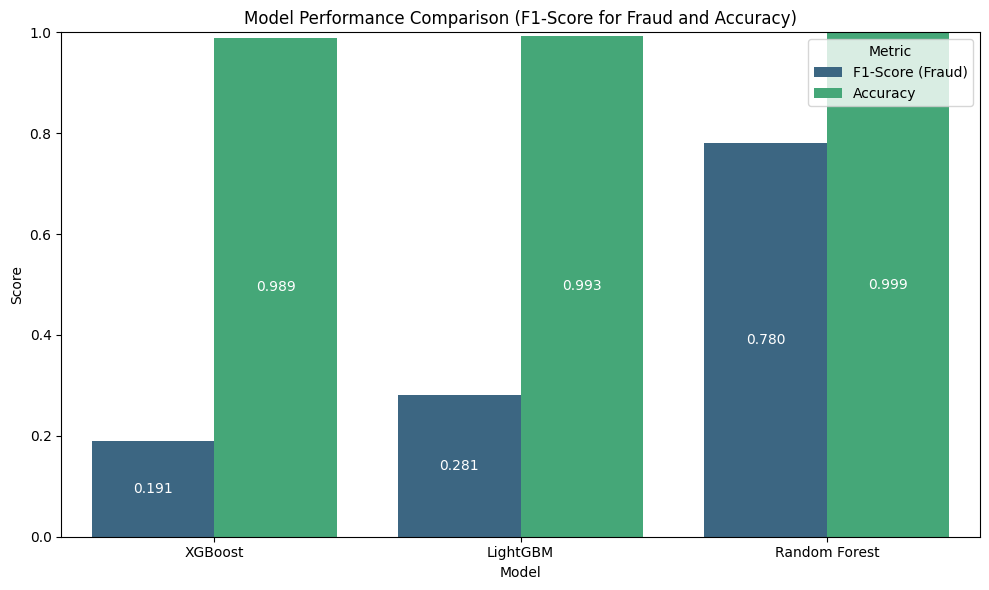

In [ ]:
# Which model performed the best (Visualizer Tool)
# We will create a bar plot comparing the F1-scores and Accuracy of the models

import pandas as pd
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate F1-scores and Accuracy for each model

# XGBoost metrics
y_pred_xgb = (xgb_model.predict(xgb.DMatrix(X_test)) > 0.5).astype(int)
f1_fraud_xgb = f1_score(y_test, y_pred_xgb, pos_label=1)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# LightGBM metrics
y_pred_lgb = (lgb_model.predict(X_test) > 0.5).astype(int)
f1_fraud_lgb = f1_score(y_test, y_pred_lgb, pos_label=1)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)

# Random Forest metrics
y_pred_rf = rf_model.predict(X_test)
f1_fraud_rf = f1_score(y_test, y_pred_rf, pos_label=1)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Prepare data for plotting
model_names = ['XGBoost', 'LightGBM', 'Random Forest']
f1_scores_fraud = [f1_fraud_xgb, f1_fraud_lgb, f1_fraud_rf]
accuracy_scores = [accuracy_xgb, accuracy_lgb, accuracy_rf]

# Create a DataFrame for easier plotting with seaborn
plot_data = pd.DataFrame({
    'Model': model_names * 2,
    'Score': f1_scores_fraud + accuracy_scores,
    'Metric': ['F1-Score (Fraud)'] * len(model_names) + ['Accuracy'] * len(model_names)
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=plot_data, palette='viridis')
plt.title('Model Performance Comparison (F1-Score for Fraud and Accuracy)')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metric')

# Add text annotations to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='center', color='white')

plt.tight_layout()
plt.show()

# Extract best performing Model using Joblib

In [ ]:
import joblib

# Determine the best performing model based on F1-score for the fraud class from the previous analysis
best_model_name = model_names[np.argmax(f1_scores_fraud)]

if best_model_name == 'Random Forest':
    best_model = rf_model
    filename = 'random_forest_model.joblib'
elif best_model_name == 'XGBoost':
    best_model = xgb_model
    filename = 'xgboost_model.joblib'
elif best_model_name == 'LightGBM':
    best_model = lgb_model
    filename = 'lightgbm_model.joblib'
else:
    best_model = None
    filename = None

if best_model:
    joblib.dump(best_model, filename)
    print(f"Best performing model ({best_model_name}) saved successfully as {filename}")
else:
    print("Could not determine the best model or save it.")

Best performing model (Random Forest) saved successfully as random_forest_model.joblib
